In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data100 = np.loadtxt("c++/100.csv", delimiter=" ")
#data500 = np.loadtxt("c++/500.csv", delimiter=" ")

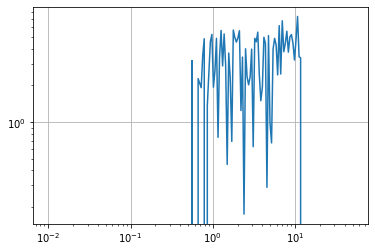

In [3]:
fig, ax = plt.subplots()

ax.plot(data100[:,0], data100[:,1])
#ax.plot(data500[:,0], data500[:,1])
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')